In [70]:
using DataFrames
using PyPlot
#using Gadfly
include("proxgrad.jl")
using LowRankModels

In [71]:
df_hotel=readtable("train_clean.csv")

,x,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool,nor_price,nor_location1,nor_location2,nor_pricediff,nor_star,nor_review,nor_bookwind
1,550,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,6618,3,4.0,0,4.13,0.1492,4.78,25,118.94,0,13901,6,3,1,1,1,0,5592.09,0,0,NA,0,-0.307063503558,0.662857864707,0.092800024,0.26283456111,-0.341986561519,0.123171926392,-0.608514490529
2,551,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,11747,4,4.5,0,4.03,0.1439,5.34,12,113.86,0,13901,6,3,1,1,1,0,5592.33,0,0,NA,0,-0.345259420951,0.599367791653,0.0607509241069,0.295460561445,0.624740189085,0.6920190256,-0.608514490529
3,552,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,18311,4,4.0,0,3.93,0.1366,5.44,14,129.1,0,13901,6,3,1,1,1,0,5592.6,0,0,NA,0,-0.230671668771,0.535877718599,0.0166078242542,0.197582560439,0.624740189085,0.123171926392,-0.608514490529
4,553,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,19599,3,4.0,0,4.16,0.1647,5.03,26,94.54,0,13901,6,3,1,1,1,0,5591.92,0,0,NA,0,-0.490524209149,0.681904886623,0.186528523687,0.419542121776,-0.341986561519,0.123171926392,-0.608514490529
5,554,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,24002,4,4.5,0,4.16,0.181,5.6,3,185.02,0,13901,6,3,1,1,1,0,5592.13,0,0,NA,0,0.189784177813,0.681904886623,0.285094623358,-0.161560340891,0.624740189085,0.6920190256,-0.608514490529
6,555,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,29732,3,3.5,0,2.83,0.047,4.69,31,59.98,0,13901,6,3,1,1,1,0,5593.31,0,0,NA,0,-0.750376749527,-0.162513084993,-0.525203373938,0.641501683113,-0.341986561519,-0.445675172816,-0.608514490529
7,556,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,35796,3,3.5,0,2.64,0.0403,5.0,27,97.59,0,13901,6,3,1,1,1,0,5590.9,0,0,NA,0,-0.46759162095,-0.283144223795,-0.565718273803,0.399953676693,-0.341986561519,-0.445675172816,-0.608514490529
8,557,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,36148,3,3.5,0,4.06,0.1241,4.84,34,74.21,0,13901,6,3,1,1,1,0,5592.39,0,0,NA,0,-0.643383067537,0.618414813569,-0.0589796754936,0.550110347528,-0.341986561519,-0.445675172816,-0.608514490529
9,558,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,41784,4,3.0,1,2.3,0.0622,5.15,22,142.32,0,13901,6,3,1,1,1,0,5591.13,0,0,NA,0,-0.131272056971,-0.499010472179,-0.433288974245,0.112677890275,0.624740189085,-1.01452227202,-0.608514490529
10,559,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,43781,4,3.5,1,3.99,0.2159,5.21,6,109.79,0,13901,6,3,1,1,1,0,5592.02,0,0,NA,0,-0.375861268154,0.573971762431,0.496134922654,0.32159989636,0.624740189085,-0.445675172816,-0.608514490529


In [3]:
size(df_hotel)

(387814,34)

In [4]:
function summary_stats(arr::DataArray)
    clean_arr = dropna(arr)
    print("missing: $(mean(isna(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end

summary_stats (generic function with 1 method)

In [5]:
summary_stats(df_hotel[:gross_bookings_usd])

missing: 0.9578096716467173%
maximum: 167740.59
minimum: 0.0
median:  238.425
mean:    473.6943643808826
std:     2223.208490543065


In [68]:
df_hotel[:nor_pricediff]

387814-element DataArrays.DataArray{Float64,1}:
  0.262835  
  0.295461  
  0.197583  
  0.419542  
 -0.16156   
  0.641502  
  0.399954  
  0.55011   
  0.112678  
  0.3216    
  0.471757  
  0.243246  
 -1.09519   
  ⋮         
  0.0470405 
 -0.556669  
 -1.26314   
 -0.42822   
 -0.813567  
  0.111265  
 -0.177745  
  0.0791527 
 -2.4834    
 -0.331883  
 -0.505289  
  0.00208346

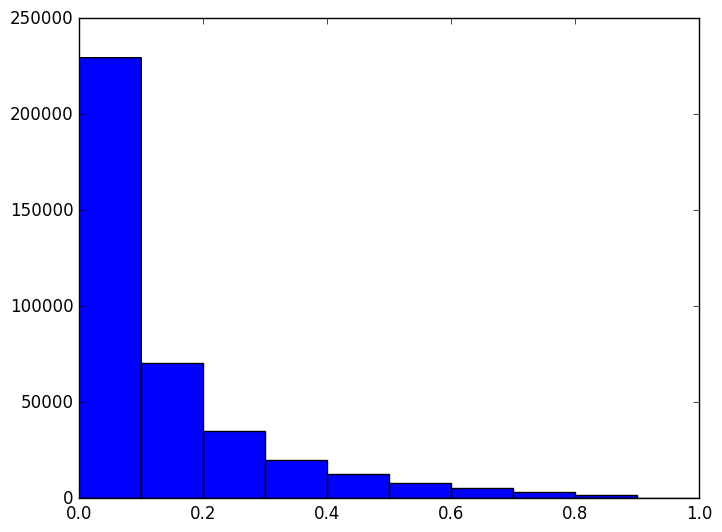

([229558.0,70698.0,35087.0,20180.0,12924.0,8008.0,5483.0,3409.0,2027.0,440.0],[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x31e2ca050>,PyObject <matplotlib.patches.Rectangle object at 0x31e2ca6d0>,PyObject <matplotlib.patches.Rectangle object at 0x31e2cad50>,PyObject <matplotlib.patches.Rectangle object at 0x31e2d7410>,PyObject <matplotlib.patches.Rectangle object at 0x31e2d7a90>,PyObject <matplotlib.patches.Rectangle object at 0x31e2d7f90>,PyObject <matplotlib.patches.Rectangle object at 0x31e2e57d0>,PyObject <matplotlib.patches.Rectangle object at 0x31e2e5e50>,PyObject <matplotlib.patches.Rectangle object at 0x31e2f3510>,PyObject <matplotlib.patches.Rectangle object at 0x31e2f3b90>])

In [69]:
PyPlot.plt[:hist](df_hotel[:prop_location_score2])

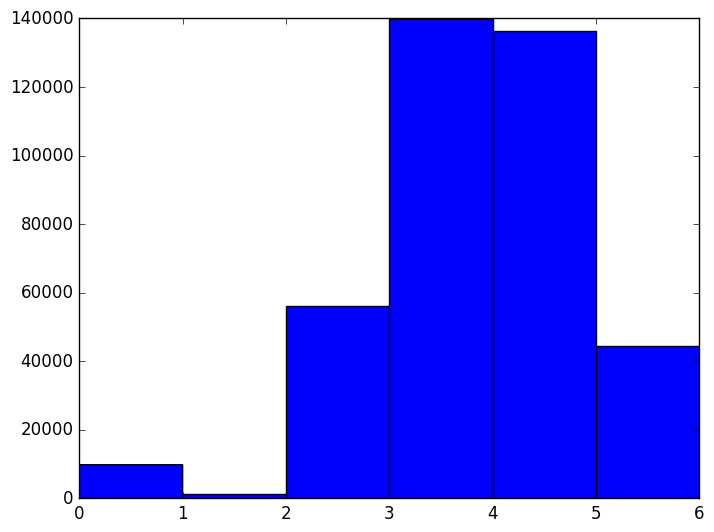

([9824.0,1212.0,56134.0,139863.0,136340.0,44441.0],[0,1,2,3,4,5,6],Any[PyObject <matplotlib.patches.Rectangle object at 0x31222d490>,PyObject <matplotlib.patches.Rectangle object at 0x31222db10>,PyObject <matplotlib.patches.Rectangle object at 0x3122381d0>,PyObject <matplotlib.patches.Rectangle object at 0x312238850>,PyObject <matplotlib.patches.Rectangle object at 0x312238ed0>,PyObject <matplotlib.patches.Rectangle object at 0x312245590>])

In [7]:
PyPlot.plt[:hist](df_hotel[:prop_starrating],bins=[0,1,2,3,4,5,6])

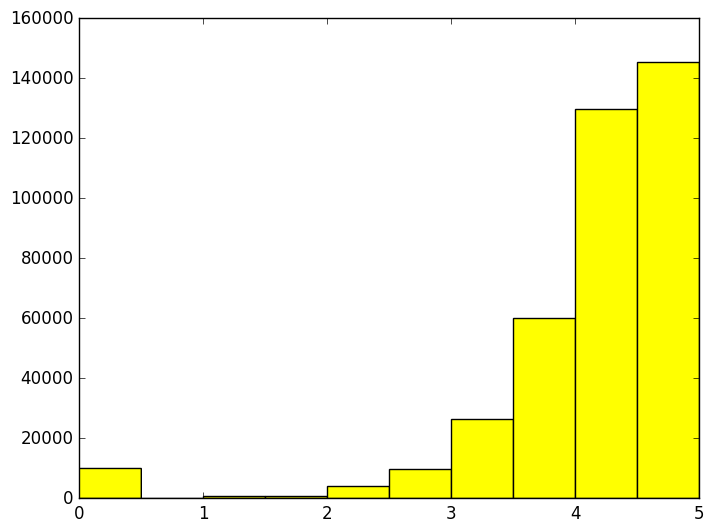

([9989.0,0.0,937.0,912.0,4017.0,9659.0,26647.0,60220.0,129827.0,145606.0],[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x31f169910>,PyObject <matplotlib.patches.Rectangle object at 0x31f169f50>,PyObject <matplotlib.patches.Rectangle object at 0x31f175610>,PyObject <matplotlib.patches.Rectangle object at 0x31f175c90>,PyObject <matplotlib.patches.Rectangle object at 0x31f302350>,PyObject <matplotlib.patches.Rectangle object at 0x31f3029d0>,PyObject <matplotlib.patches.Rectangle object at 0x31f302ed0>,PyObject <matplotlib.patches.Rectangle object at 0x31f310710>,PyObject <matplotlib.patches.Rectangle object at 0x31f310d90>,PyObject <matplotlib.patches.Rectangle object at 0x31f31e450>])

In [8]:
plt[:hist](df_hotel[:prop_review_score],color="yellow")

In [72]:
df_book=df_hotel[df_hotel[:booking_bool].==1,:]

,x,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool,nor_price,nor_location1,nor_location2,nor_pricediff,nor_star,nor_review,nor_bookwind
1,568,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,77040,4,4.0,0,3.14,0.0839,5.39,16,153.5,0,13901,6,3,1,1,1,0,5593.11,0,1,924.0,1,-0.04721096318,0.0343061414737,-0.302069074683,0.0408749997727,0.624740189085,0.123171926392,-0.608514490529
2,586,49,2013-02-07 18:40:10,16,31,2.5,270.08,31,13962,4,4.5,1,6.42,0.7886,5.43,4,115.24,0,2799,1,5,2,0,1,0,144.11,0,1,128.48,1,-0.334883364652,2.11678053764,3.9592518111,0.860314248355,0.624740189085,0.6920190256,-0.570646922369
3,1082,80,2013-01-03 10:58:19,5,219,2.5,122.34,219,107761,4,3.5,1,2.64,0.5445,4.99,4,127.0,0,7274,2,24,1,0,1,0,386.87,0,1,324.08,1,-0.246461319662,-0.283144223795,2.48317911603,-0.164065092885,0.624740189085,-0.445675172816,-0.210905024855
4,1206,87,2013-05-15 18:22:23,16,31,3.74,210.6,31,33406,4,4.0,1,0.69,0.5935,4.79,2,96.65,0,26262,1,3,1,0,1,1,166.25,0,1,96.9,1,-0.474659369444,-1.52120064835,2.77948211504,0.597700635419,0.624740189085,0.123171926392,-0.608514490529
5,1672,113,2012-11-20 11:06:17,23,181,3.89,137.25,181,97028,4,4.0,1,3.47,0.2863,4.91,12,170.25,0,3531,1,2,1,0,1,1,NA,0,1,191.79,1,0.0787302998793,0.243823382551,0.921843721234,-0.346077071135,0.624740189085,0.123171926392,-0.627448274608
6,2898,184,2013-06-25 11:59:56,18,129,3.5,334.43,219,136797,2,4.0,0,1.61,0.4388,0.0,1,185.77,0,24483,1,46,2,1,1,1,NA,0,1,206.74,1,0.195423338845,-0.93709197625,1.84401121816,0.820623562907,-1.30871331212,0.123171926392,0.205638224897
7,3196,218,2013-03-14 00:42:18,32,55,5.0,185.91,129,19663,4,4.5,0,1.61,0.0056,5.12,1,143.3,0,22417,1,0,1,1,2,0,528.35,1,1,141.69,1,-0.123903553222,-0.93709197625,-0.775549173103,0.1395236937,0.624740189085,0.6920190256,-0.665315842768
8,3570,247,2013-02-11 15:37:28,5,219,2.57,122.51,219,19796,3,4.5,1,1.95,0.0807,4.83,9,98.0,1,5837,1,2,1,1,1,0,160.19,0,1,110.2,1,-0.464508879585,-0.721225727867,-0.321419474618,0.0232775114029,-0.341986561519,0.6920190256,-0.627448274608
9,3731,265,2013-01-23 18:27:52,5,219,2.3,74.79,219,24513,2,2.5,0,2.94,0.0217,4.51,13,70.0,0,9402,1,14,4,0,2,0,9.56,0,1,158.48,1,-0.675037558132,-0.0926740046339,-0.678192473428,-0.103373025332,-1.30871331212,-1.58336937123,-0.400242865652
10,4303,312,2013-05-06 10:13:48,5,219,3.24,127.82,219,49989,3,3.0,1,1.61,0.0308,4.51,4,139.0,0,15893,1,2,1,0,1,0,1007.15,0,1,161.15,1,-0.156234743142,-0.93709197625,-0.623164773611,-0.205939408277,-0.341986561519,-1.01452227202,-0.627448274608


In [73]:
summary_stats(df_book[:price_usd])

missing: 0.0%
maximum: 1690.0
minimum: 9.34
median:  119.11
mean:    143.31997494193863
std:     90.06296981449545


In [74]:
summary_stats(df_book[:prop_starrating])

missing: 0.0%
maximum: 5
minimum: 0
median:  4.0
mean:    3.4613127979464613
std:     0.9480746206309232


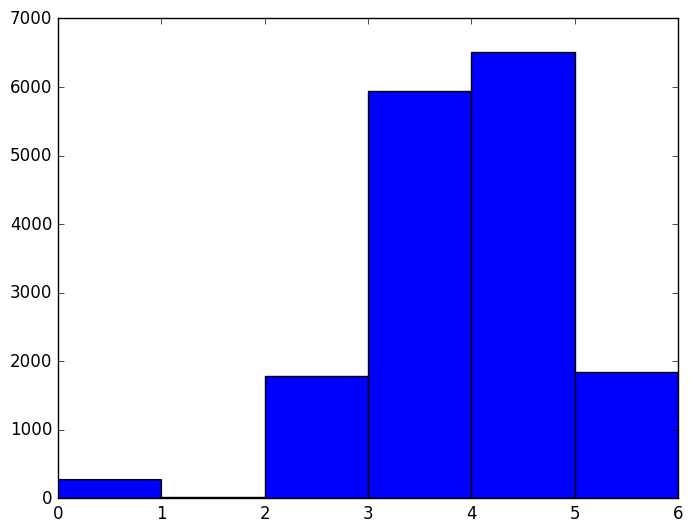

([274.0,16.0,1787.0,5937.0,6507.0,1841.0],[0,1,2,3,4,5,6],Any[PyObject <matplotlib.patches.Rectangle object at 0x306a78d90>,PyObject <matplotlib.patches.Rectangle object at 0x306a83450>,PyObject <matplotlib.patches.Rectangle object at 0x306a83ad0>,PyObject <matplotlib.patches.Rectangle object at 0x306a83fd0>,PyObject <matplotlib.patches.Rectangle object at 0x306a91810>,PyObject <matplotlib.patches.Rectangle object at 0x306a91e90>])

In [12]:
PyPlot.plt[:hist](df_book[:prop_starrating],bins=[0,1,2,3,4,5,6])

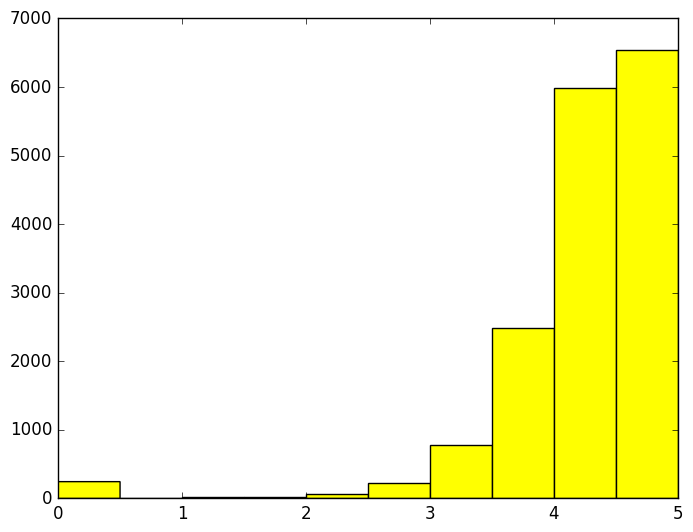

([245.0,0.0,15.0,15.0,59.0,229.0,782.0,2489.0,5990.0,6538.0],[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x306b4eb10>,PyObject <matplotlib.patches.Rectangle object at 0x306b4efd0>,PyObject <matplotlib.patches.Rectangle object at 0x306b59810>,PyObject <matplotlib.patches.Rectangle object at 0x306b59e90>,PyObject <matplotlib.patches.Rectangle object at 0x306b67550>,PyObject <matplotlib.patches.Rectangle object at 0x306b67bd0>,PyObject <matplotlib.patches.Rectangle object at 0x306b74290>,PyObject <matplotlib.patches.Rectangle object at 0x306b74910>,PyObject <matplotlib.patches.Rectangle object at 0x306b74f90>,PyObject <matplotlib.patches.Rectangle object at 0x306b81650>])

In [13]:
plt[:hist](df_book[:prop_review_score],color="yellow")

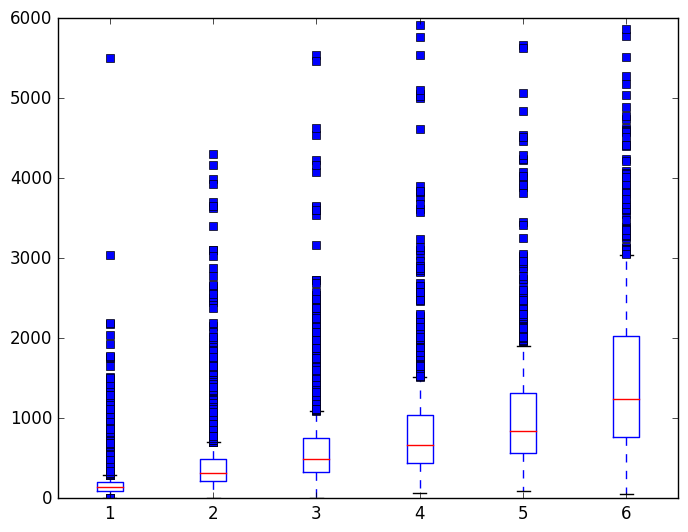

(0,6000)

In [14]:
numstayarr=Array(Any,6)


numstayarr[1]=df_book[df_book[:srch_length_of_stay].==1,:][:gross_bookings_usd]
numstayarr[2]=df_book[df_book[:srch_length_of_stay].==2,:][:gross_bookings_usd]
numstayarr[3]=df_book[df_book[:srch_length_of_stay].==3,:][:gross_bookings_usd]
numstayarr[4]=df_book[df_book[:srch_length_of_stay].==4,:][:gross_bookings_usd]
numstayarr[5]=df_book[df_book[:srch_length_of_stay].==5,:][:gross_bookings_usd]
numstayarr[6]=df_book[df_book[:srch_length_of_stay].>=6,:][:gross_bookings_usd]
boxplot(numstayarr, # Each column/cell is one box
     # Notched center
    whis=0.8, # Whisker length as a percent of inner quartile range
    widths=0.25, # Width of boxes
vert=true, # Horizontal boxes
    sym="rs")
ylim(0,6000)

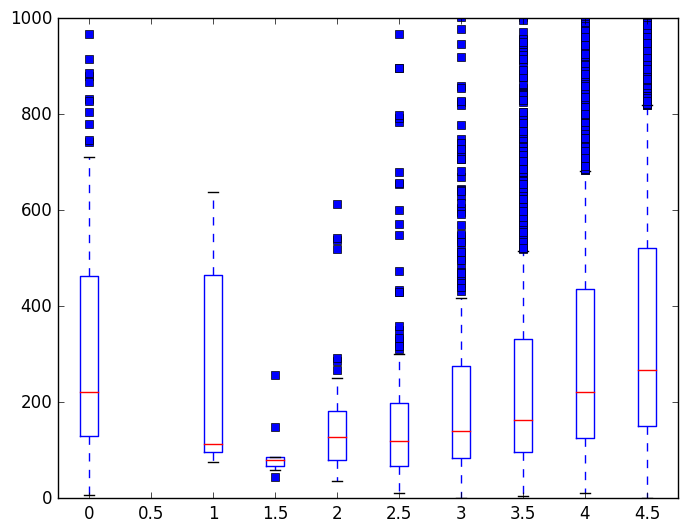

(0,1000)

In [88]:
numratearr=Array(Any,10)

numratearr[1]=df_book[df_book[:prop_review_score].==0,:][:gross_bookings_usd]
numratearr[2]=df_book[df_book[:prop_review_score].==0.5,:][:gross_bookings_usd]
numratearr[3]=df_book[df_book[:prop_review_score].==1,:][:gross_bookings_usd]
numratearr[4]=df_book[df_book[:prop_review_score].==1.5,:][:gross_bookings_usd]
numratearr[5]=df_book[df_book[:prop_review_score].==2,:][:gross_bookings_usd]
numratearr[6]=df_book[df_book[:prop_review_score].==2.5,:][:gross_bookings_usd]
numratearr[7]=df_book[df_book[:prop_review_score].==3,:][:gross_bookings_usd]
numratearr[8]=df_book[df_book[:prop_review_score].==3.5,:][:gross_bookings_usd]
numratearr[9]=df_book[df_book[:prop_review_score].==4,:][:gross_bookings_usd]
numratearr[10]=df_book[df_book[:prop_review_score].==4.5,:][:gross_bookings_usd]
boxplot(numratearr, # Each column/cell is one box
     # Notched center
    whis=0.8, # Whisker length as a percent of inner quartile range
    widths=0.3, # Width of boxes
 # Horizontal boxes
    sym="rs")
xticks([1,2,3,4,5,6,7,8,9,10],["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5"])
ylim([0,1000])

In [18]:
n=size(df_book)[1]

16362

In [148]:
pricedata=df_book[:price_usd].data
numday=df_book[:srch_length_of_stay].data
reviewrate=df_book[:prop_review_score].data
starrate=df_book[:prop_starrating].data
prombool=df_book[:promotion_flag].data
branbool=df_book[:prop_brand_bool].data
locascore=df_book[:prop_location_score2].data
numroom=df_book[:srch_room_count].data
#distance=df_book[:orig_destination_distance].data
vis_price=df_book[:visitor_hist_adr_usd].data
book_wind=df_book[:srch_booking_window].data


16362-element Array{Int64,1}:
   3
   5
  24
   3
   2
  46
   0
   2
  14
   2
   1
 250
 183
   ⋮
   5
  59
  25
   8
 199
   8
  17
   3
   7
 165
 149
   1

In [77]:
X_1=[pricedata ones(n)]
y=df_book[:gross_bookings_usd].data
w=X_1\y

2-element Array{Float64,1}:
    6.60736
 -473.272  

In [20]:
inc_mse=1/n*sum((y-X_1*w).^2)

4.58825720944119e6

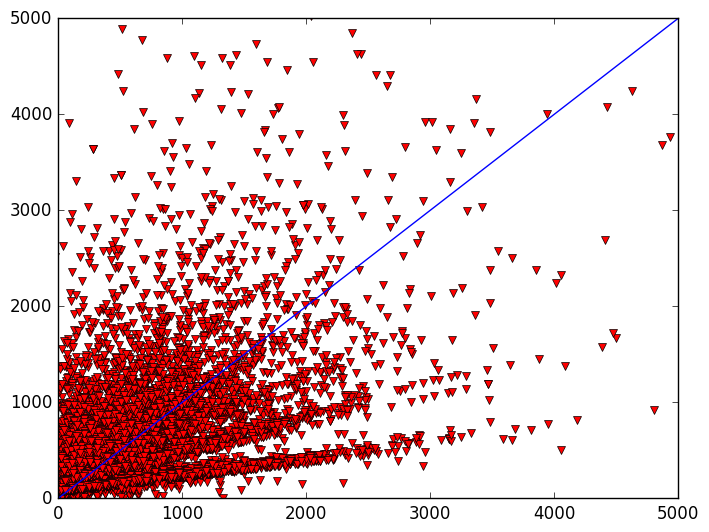

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31cabb350>
 PyObject <matplotlib.lines.Line2D object at 0x31cabb450>

In [21]:
plot(X_1*w,y,"rv",xlim([0,5000]),ylim([0,5000]))

In [23]:
X_s=[pricedata reviewrate starrate ones(n)]
y=df_book[:gross_bookings_usd].data
w_s=X_s\y

4-element Array{Float64,1}:
    6.83145
  -25.9268 
  -40.6207 
 -260.987  

In [24]:
inc_mse=1/n*sum((y-X_s*w_s).^2)

4.586461427516345e6

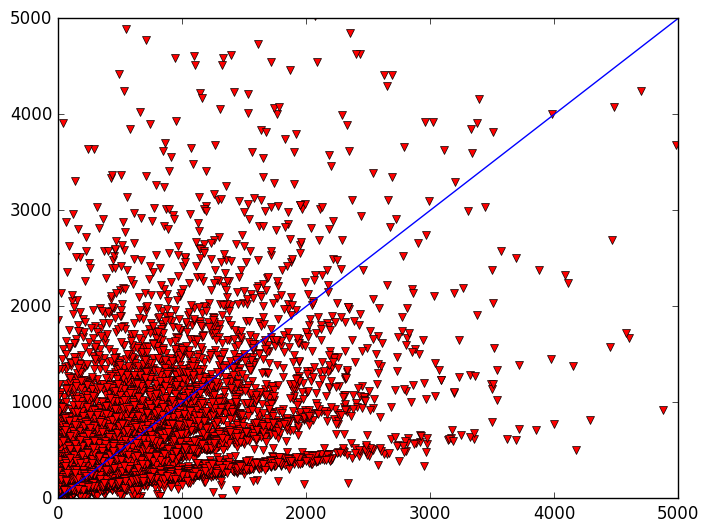

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31cea8c90>
 PyObject <matplotlib.lines.Line2D object at 0x31cea8d90>

In [26]:
plot(X_s*w_s,y,"rv",xlim([0,5000]),ylim([0,5000]))

In [27]:
X_3=[pricedata numday numroom ones(n)]
w_3=X_3\y

4-element Array{Float64,1}:
     5.60642
   387.788  
   222.525  
 -1440.04   

In [28]:
inc_mse_3=1/n*sum((y-X_3*w_3).^2)

4.0190065007948535e6

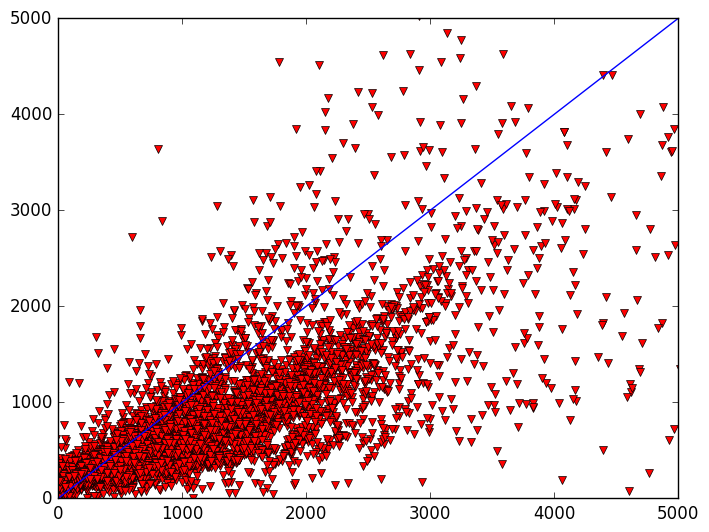

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d254790>
 PyObject <matplotlib.lines.Line2D object at 0x31d254890>

In [29]:
plot(X_3*w_3,y,"rv",xlim([0,5000]),ylim([0,5000]))

In [30]:
X_4=[pricedata numday reviewrate starrate ones(n)]
w_4=X_4\y

5-element Array{Float64,1}:
     5.89987
   388.81   
     8.36157
   -66.4221 
 -1012.69   

In [31]:
inc_mse_4=1/n*sum((y-X_4*w_4).^2)

4.0356383429251835e6

In [32]:
X_5=[pricedata numday reviewrate starrate prombool ones(n)]
w_5=X_5\y

6-element Array{Float64,1}:
     5.8675 
   390.201  
     8.64368
   -62.3014 
   -42.6488 
 -1014.91   

In [33]:
inc_mse_5=1/n*sum((y-X_5*w_5).^2)

4.0353008160885293e6

In [34]:
X_6=[pricedata numday reviewrate starrate prombool branbool ones(n)]
w_6=X_6\y

7-element Array{Float64,1}:
     5.86699
   390.703  
     4.86813
   -61.2075 
   -36.9189 
    43.2788 
 -1035.58   

In [35]:
inc_mse_6=1/n*sum((y-X_6*w_6).^2)

4.0349089954543426e6

In [36]:
X_7=[pricedata numday reviewrate starrate prombool branbool locascore ones(n)]
w_7=X_7\y

8-element Array{Float64,1}:
    5.97399
  392.72   
    6.33442
  -53.4725 
  -20.7694 
   26.4767 
  -30.7715 
 -991.161  

In [37]:
inc_mse_7=1/n*sum((y-X_7*w_7).^2)

4.0330432758310074e6

In [38]:
X_8=[pricedata numday numroom reviewrate starrate prombool branbool locascore ones(n)]
w_8=X_8\y

9-element Array{Float64,1}:
     5.98271
   392.578  
   225.76   
     7.77727
   -54.878  
   -21.0128 
     7.21158
   -34.8859 
 -1247.04   

In [39]:
inc_mse_8=1/n*sum((y-X_8*w_8).^2)

4.0127652592233694e6

In [40]:
X_9=[pricedata numday numroom distance reviewrate starrate prombool branbool locascore ones(n)]
w_9=X_9\y

10-element Array{Float64,1}:
     6.01916  
   394.753    
   226.733    
    -0.0318436
    12.6644   
   -52.0123   
   -19.2585   
    -0.493555 
   -32.3173   
 -1257.14     

In [41]:
inc_mse_9=1/n*sum((y-X_9*w_9).^2)

4.00860900583538e6

In [42]:
X_10=[pricedata numday numroom distance vis_price reviewrate starrate prombool branbool locascore ones(n)]
w_10=X_10\y

11-element Array{Float64,1}:
     6.01537   
   394.736     
   226.734     
    -0.0318651 
     0.00905121
    12.6051    
   -52.1218    
   -19.2591    
    -0.469559  
   -32.3375    
 -1257.51      

In [43]:
inc_mse_10=1/n*sum((y-X_10*w_10).^2)

4.0086081580435587e6

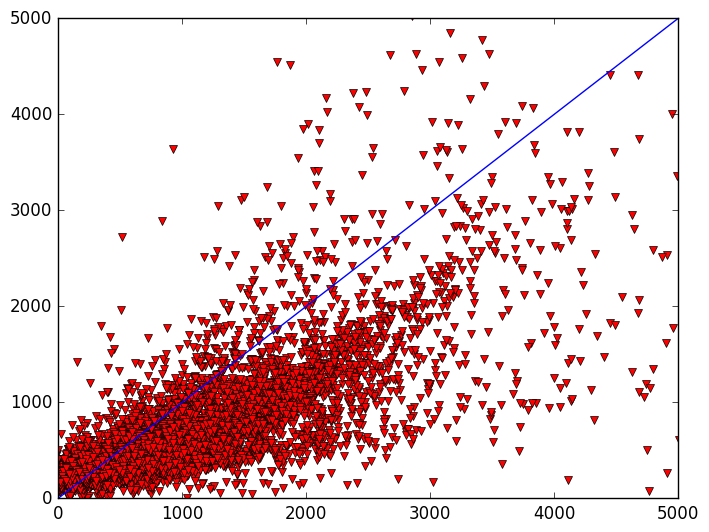

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x306bc9ed0>
 PyObject <matplotlib.lines.Line2D object at 0x306bc9b10>

In [44]:
plot(X_10*w_10,y,"rv",xlim([0,5000]),ylim([0,5000]))

In [46]:
X_11=[pricedata numday numroom starrate prombool branbool locascore book_wind vis_price ones(n)]
w_11=X_11\y

10-element Array{Float64,1}:
     6.06496  
   394.944    
   227.803    
   -55.3478   
   -23.7781   
    -6.70324  
   -31.9472   
    -1.21373  
     0.0152226
 -1196.65     

In [47]:
inc_mse_11=1/n*sum((y-X_11*w_11).^2)

4.0092176963791405e6

In [48]:
starsq=starrate.^1
locasq=locascore.^1
pricesq=pricedata.^1.05
X_12=[pricesq numday numroom starrate prombool branbool locasq book_wind vis_price ones(n)]
w_12=X_12\y

10-element Array{Float64,1}:
     4.46857   
   394.338     
   227.912     
   -55.2871    
   -23.4332    
    -6.62711   
   -31.9982    
    -1.20979   
    -0.00279115
 -1151.01      

In [49]:
inc_mse_12=1/n*sum((y-X_12*w_12).^2)

4.0007612258622595e6

In [151]:
roomday=numday.*numroom
priceroomday=roomday.*pricedata
X_13=[priceroomday starrate prombool branbool locasq book_wind vis_price ones(16362)]
w_13=X_13\y

8-element Array{Float64,1}:
   2.30936 
 -66.5706  
 -10.9144  
 -84.2883  
 -60.6626  
  -1.94927 
  -0.446593
 144.221   

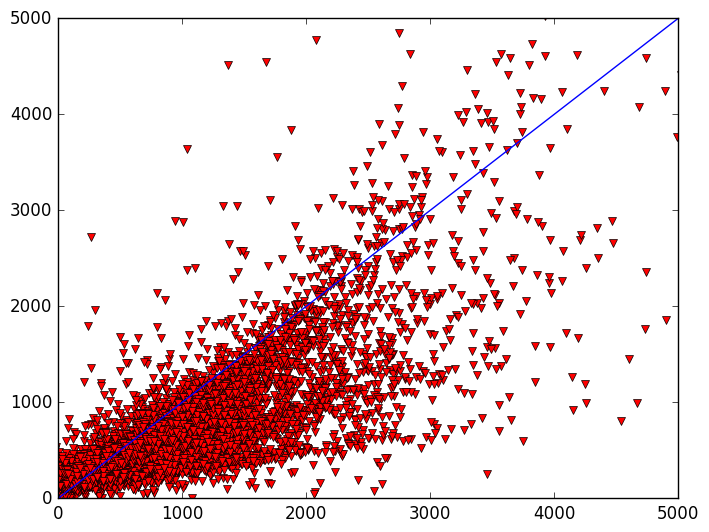

4.177510054613489e6

In [54]:
plot(X_13*w_13,y,"rv",xlim([0,5000]),ylim([0,5000]))
inc_mse_13=1/n*sum((y-X_13*w_13).^2)

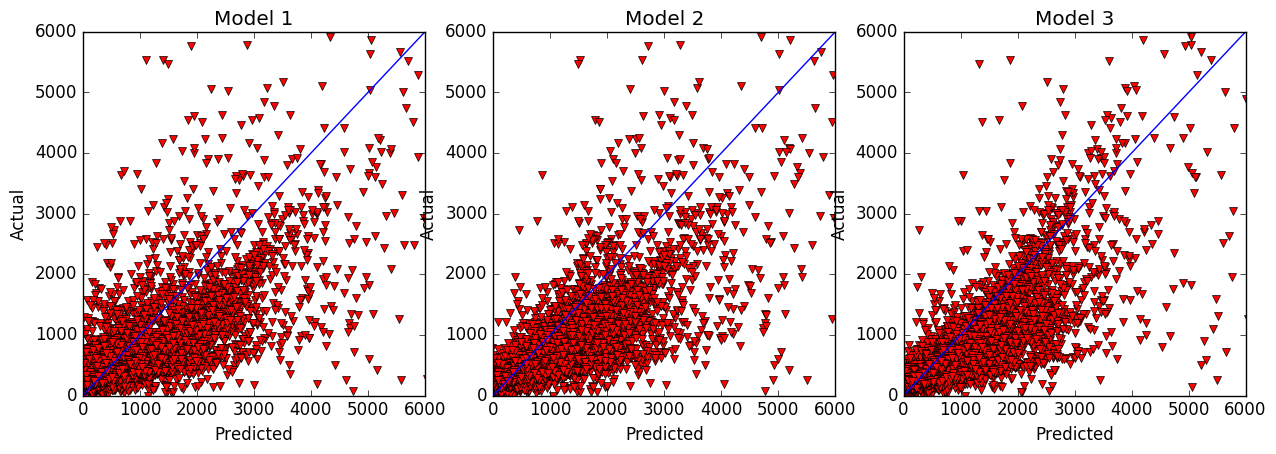

PyObject <matplotlib.text.Text object at 0x31f2f1610>

In [55]:
fig = figure("pyplot_scatterplot",figsize=(15,10))
subplot(231)
plot(X_4*w_4,y,"rv",xlim([0,6000]),ylim([0,6000]))
title("Model 1")
xlabel("Predicted")
ylabel("Actual")


subplot(232)
plot(X_12*w_12,y,"rv",xlim([0,6000]),ylim([0,6000]))
title("Model 2")
xlabel("Predicted")
ylabel("Actual")

subplot(233)
plot(X_13*w_13,y,"rv",xlim([0,6000]),ylim([0,6000]))
title("Model 3")
xlabel("Predicted")
ylabel("Actual")

In [145]:
X_13=[priceroomday starrate prombool branbool locasq book_wind vis_price ones(n)]

LoadError: LoadError: UndefVarError: priceroomday not defined
while loading In[145], in expression starting on line 1

In [152]:
rand00 = zeros(15000)
rand11 = ones(1362)
r_index = [rand00; rand11] 
shuffle!(r_index)


Xtrain=X_13[r_index.==0,:]
Xtest=X_13[r_index.==1,:]
Ytrain=y[r_index.==0,:]
Ytest=y[r_index.==1,:]
Ytrain=Ytrain[:,1]
Ytest=Ytest[:,1]

1362-element Array{Float64,1}:
  707.56
  378.42
  127.48
  170.85
  426.33
   55.13
  849.43
   96.0 
  328.28
  105.98
  372.42
  123.78
  403.64
    ⋮   
  991.12
  126.54
  204.38
  151.53
  275.56
  779.96
  387.34
  205.16
  120.35
  173.61
  260.78
 1645.8 

In [153]:
X_13

16362×8 Array{Float64,2}:
  921.0   4.0  0.0  0.0  3.14    3.0  180.75  1.0
  115.24  4.0  0.0  1.0  6.42    5.0  270.08  1.0
  254.0   4.0  0.0  1.0  2.64   24.0  122.34  1.0
   96.65  4.0  0.0  1.0  0.69    3.0  210.6   1.0
  170.25  4.0  0.0  1.0  3.47    2.0  137.25  1.0
  185.77  2.0  0.0  0.0  1.61   46.0  334.43  1.0
  286.6   4.0  0.0  0.0  1.61    0.0  185.91  1.0
   98.0   3.0  1.0  1.0  1.95    2.0  122.51  1.0
  140.0   2.0  0.0  0.0  2.94   14.0   74.79  1.0
  139.0   3.0  0.0  1.0  1.61    2.0  127.82  1.0
  340.0   3.0  0.0  1.0  2.4     1.0  240.26  1.0
  653.48  4.0  0.0  0.0  1.61  250.0  203.77  1.0
  207.0   5.0  0.0  1.0  4.43  183.0  100.54  1.0
    ⋮                            ⋮               
   82.0   3.0  0.0  1.0  1.95    5.0  159.42  1.0
  250.0   4.0  1.0  0.0  1.95   59.0  303.24  1.0
  507.0   4.0  0.0  1.0  2.3    25.0  122.33  1.0
   84.38  0.0  0.0  1.0  1.79    8.0  274.75  1.0
  358.2   4.0  0.0  1.0  2.4   199.0  244.17  1.0
 1025.0   4.0  1.0  0.0 

In [154]:
maxiter=10000
stepsize=0.01

w_1=proxgrad(QuadLoss(),QuadReg(),Xtrain,Ytrain;maxiters=maxiter,stepsize=stepsize)

8-element Array{Float64,1}:
  2.3958  
 -6.297   
 -0.674654
 -1.33632 
 -7.0378  
 -2.78758 
 -1.68082 
 -1.52921 

In [140]:
n=size(Ytest,1)
#X_13=[priceroomday starrate prombool branbool locasq book_wind vis_price ones(n)]

1362

In [155]:
quad_mse_1=1/n*sum((Ytest-Xtest*w_1).^2)

1.1453973543575557e6

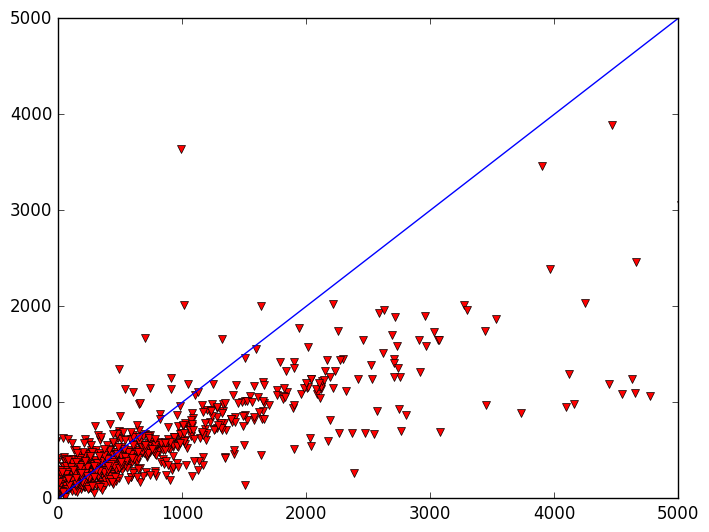

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x326dbd1d0>
 PyObject <matplotlib.lines.Line2D object at 0x326dbd2d0>

In [156]:
plot(Xtest*w_1,Ytest,"rv",xlim([0,5000]),ylim([0,5000]))

In [157]:
maxiter=10000
stepsize=0.01

w_2=proxgrad(HuberLoss(),QuadReg(),Xtrain,Ytrain;maxiters=maxiter,stepsize=stepsize)

8-element Array{Float64,1}:
  1.12127   
  0.060334  
  0.0893235 
 -0.0518985 
  0.120397  
  0.00157464
  0.00867222
 -0.0584724 

In [158]:
quad_mse_2=1/n*sum((Ytest-Xtest*w_2).^2)

205584.86675332824

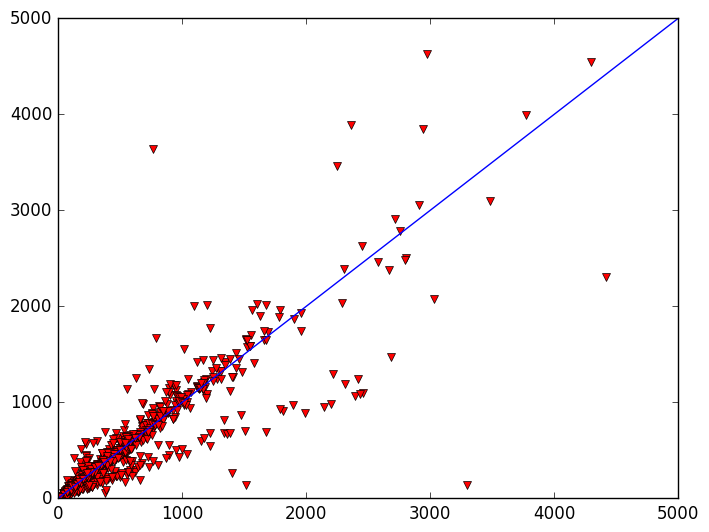

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x327251b10>
 PyObject <matplotlib.lines.Line2D object at 0x327251c10>

In [159]:
plot(Xtest*w_2,Ytest,"rv",xlim([0,5000]),ylim([0,5000]))

In [163]:
maxiter=10000
stepsize=0.01

w_3=proxgrad(HuberLoss(),OneReg(100),Xtrain,Ytrain;maxiters=maxiter,stepsize=stepsize)

8-element Array{Float64,1}:
  1.12127   
  0.0601993 
  0.0891596 
 -0.0517163 
  0.120283  
  0.00157478
  0.00867409
 -0.0582845 

In [164]:
quad_mse_3=1/n*sum((Ytest-Xtest*w_3).^2)

205584.87805870743

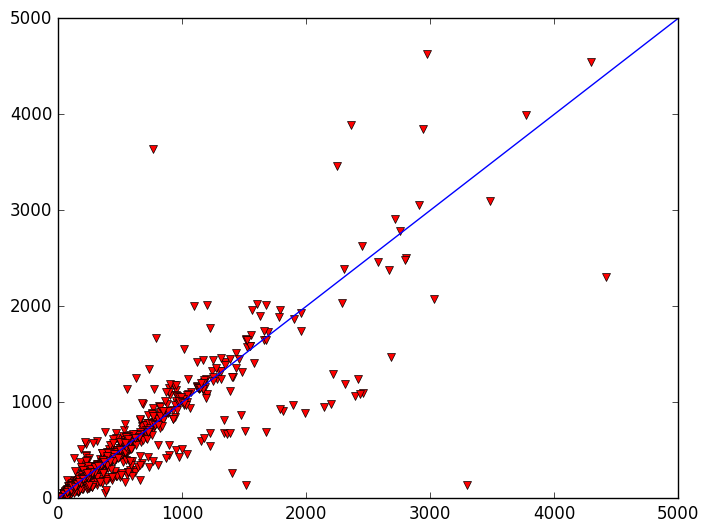

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3277d9dd0>
 PyObject <matplotlib.lines.Line2D object at 0x3277d9ed0>

In [165]:
plot(Xtest*w_3,Ytest,"rv",xlim([0,5000]),ylim([0,5000]))

In [ ]:
#hello

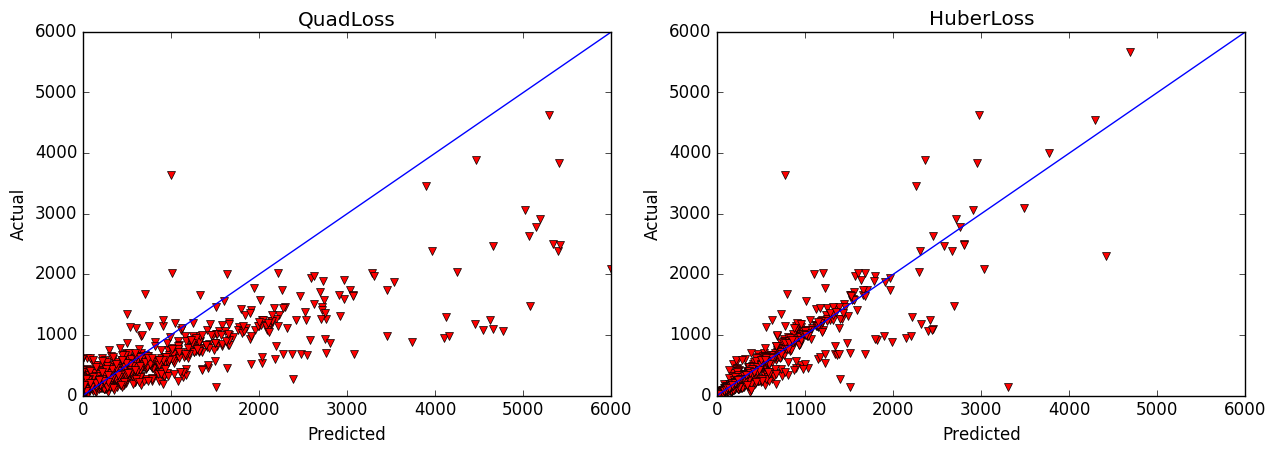

PyObject <matplotlib.text.Text object at 0x327a32690>

In [166]:
fig = figure("pyplot_scatterplot",figsize=(15,10))
subplot(221)
plot(Xtest*w_1,Ytest,"rv",xlim([0,6000]),ylim([0,6000]))
title("QuadLoss")
xlabel("Predicted")
ylabel("Actual")


subplot(222)
plot(Xtest*w_2,Ytest,"rv",xlim([0,6000]),ylim([0,6000]))
title("HuberLoss")
xlabel("Predicted")
ylabel("Actual")

